First, import needed modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

Initalize variables

In [2]:
path = os.getcwd()
print(path)

/Users/jan/Dropbox/UP_EPQM/2222/MA/powerlinemonsters


Import datasets

In [3]:
btw = pd.read_csv(f'{path}/data/btw_treat.csv', encoding = 'UTF-8-SIG', sep=',', converters={'AGS': str})

View summary statistics

In [5]:
columns = ['Union', 'SPD', 'FDP', 'Linke', 'Grüne', 'Andere']
btw.describe().to_csv(f'{path}/tables/btw/btw_descriptives.csv', sep=';', encoding='utf-8-sig', decimal=',', columns=columns, float_format='%.2f')
btw[columns].describe()

,Union,SPD,FDP,Linke,Grüne,Andere
count,156154.000000,156154.000000,156154.000000,156154.000000,156154.000000,156154.000000
mean,43.992215,29.873656,6.749539,7.119668,5.653849,6.611073
std,12.350606,12.480348,4.534176,8.205358,3.416734,6.707550
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.966941,20.000000,3.392857,0.873362,3.205128,2.194357
50%,42.857143,29.000485,5.781812,4.105166,5.029889,4.559748
75%,51.940040,38.622662,9.049774,10.000000,7.451266,8.691692
max,100.000000,88.235294,63.273728,55.294118,54.545455,65.714286


In [6]:
btw['year'].value_counts().to_csv(f'{path}/tables/btw/btw_obsyears.csv', sep=';', encoding='utf-8-sig', decimal=',', float_format='%.2f')

Split data in Erst- and Zweitstimme

In [43]:
erst = btw[btw['first_vote'] == 1]
zweit = btw[btw['second_vote'] == 1]
erst.head(10)

,AGS,GEN,year,Land,state_id,Kreis,Wahlkreis,post_1998,post_2002,post_2005,...,Grüne,Andere,treatment_05,treatment_09,treatment_13,treatment_30,treatment_60,treatment_100,ever_treated,never_treated
0,01001000,Flensburg,1994.0,SH,1,101,1.0,0.0,0.0,0.0,...,6.770602,1.921778,NaN,30.0,100.0,2010.0,2010.0,2010.0,30,1.0
2,01001000,Flensburg,1998.0,SH,1,101,1.0,0.0,0.0,0.0,...,4.009060,1.798064,NaN,30.0,100.0,2010.0,2010.0,2010.0,30,1.0
4,01001000,Flensburg,2002.0,SH,1,101,1.0,1.0,0.0,0.0,...,5.835101,0.399580,NaN,30.0,100.0,2010.0,2010.0,2010.0,30,1.0
6,01001000,Flensburg,2005.0,SH,1,101,1.0,1.0,1.0,0.0,...,5.656662,0.802172,NaN,30.0,100.0,2010.0,2010.0,2010.0,30,1.0
8,01001000,Flensburg,2009.0,SH,1,101,1.0,1.0,1.0,1.0,...,12.164217,1.097424,NaN,30.0,100.0,2010.0,2010.0,2010.0,30,1.0
10,01001000,Flensburg,2013.0,SH,1,101,1.0,1.0,1.0,1.0,...,9.803625,6.674164,NaN,30.0,100.0,2010.0,2010.0,2010.0,30,1.0
12,01001000,Flensburg,2017.0,SH,1,101,1.0,1.0,1.0,1.0,...,12.107541,8.532992,NaN,30.0,100.0,2010.0,2010.0,2010.0,30,1.0
14,01002000,Kiel,1994.0,SH,1,102,5.0,0.0,0.0,0.0,...,8.317277,1.280413,NaN,60.0,NaN,0.0,2010.0,2010.0,60,1.0
16,01002000,Kiel,1998.0,SH,1,102,5.0,0.0,0.0,0.0,...,5.999482,1.588057,NaN,60.0,NaN,0.0,2010.0,2010.0,60,1.0
18,01002000,Kiel,2002.0,SH,1,102,5.0,1.0,0.0,0.0,...,6.802796,0.796048,NaN,60.0,NaN,0.0,2010.0,2010.0,60,1.0


Calculate average vote shares in all years by treatment variable

In [44]:
avg_dfs = {2005: 'treatment_05', 2010: 'treatment_09', 2014: 'treatment_13'}
for year, treatment in avg_dfs.items():
    erst[treatment] = erst[treatment].astype('Int64').astype(str)
    erst[treatment] = np.where(erst[treatment].isna(), 'None', erst[treatment])
    avg_dfs[year] = erst[['Union', 'SPD', 'FDP', 'Linke', 'Grüne', 'Andere', treatment, 'year']].groupby([treatment, 'year'], as_index = False).mean()
    avg_dfs[year].rename(columns = {f'{treatment}':'treatment'}, inplace = True)
avg_dfs[2005].head(15)

/var/folders/wm/mtrphj0s0msgrmyshf3hgk740000gn/T/ipykernel_13527/3274966828.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  erst[treatment] = erst[treatment].astype('Int64').astype(str)
/var/folders/wm/mtrphj0s0msgrmyshf3hgk740000gn/T/ipykernel_13527/3274966828.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  erst[treatment] = np.where(erst[treatment].isna(), 'None', erst[treatment])
/var/folders/wm/mtrphj0s0msgrmyshf3hgk740000gn/T/ipykernel_13527/3274966828.py:3: SettingWithCopyWarning: 
A value is 

,treatment,year,Union,SPD,FDP,Linke,Grüne,Andere
0,100,1994.0,48.580569,36.950194,3.263176,4.311048,4.955536,1.939477
1,100,1998.0,41.456686,43.593507,2.936851,5.985444,3.322778,2.704734
2,100,2002.0,42.739965,41.036067,5.706252,5.642263,3.778038,1.097415
3,100,2005.0,42.474395,36.485338,4.669918,9.453034,3.463747,3.453568
4,100,2009.0,41.084013,26.185839,9.774811,13.078189,6.847806,3.029340
5,100,2013.0,48.331591,27.531461,2.084986,9.561722,5.028696,7.461544
6,100,2017.0,40.544219,23.249162,6.663310,8.084372,5.542508,15.916429
7,30,1994.0,48.883321,38.141768,3.233112,3.667622,4.664565,1.409612
8,30,1998.0,41.241577,44.292633,2.843675,5.480191,3.449603,2.692320
9,30,2002.0,42.460173,42.377829,5.561778,5.270590,3.643397,0.686232


Plot the average vote shares over years for treated and untreated municipalities

In [45]:
treatments = ['None', '30', '60', '100']
blacks = ['#000000', '#191919', '#323232', '#4c4c4c']
reds = ['#cc0000', '#d11919', '#d63232', '#db4c4c']
yellows = ['#ffff00', '#ffff19', '#ffff32', '#ffff4c']
purples = ['#800080', '#8c198c', '#993299', '#a64ca6']
greens = ['#008000', '#198c19', '#329932', '#4ca64c']
greys = ['#808080', '#8c8c8c', '#999999', '#a6a6a6']
markers = ['o', 's', 'v', 'D']

for year, df in avg_dfs.items():
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10), dpi=300)
    #set x labels
    plt.setp(axes, xticks=[1994,1998,2002,2005,2009,2013,2017])
    # set legend font size
    plt.rc('legend',fontsize=6)
    # title for entire figure
    fig.suptitle(f'Average First Vote Shares \n by treatment status in {year}', fontsize=20)

    for i, treatment in enumerate(treatments):
        plot_data = df[df['treatment'] == treatment]
        # edit subplots
        axes[0, 0].set_title('Union', fontsize=12)
        axes[0, 0].set_ylabel('% Votes', fontsize=10)
        axes[0, 0].plot(plot_data['year'], plot_data['Union'], color=blacks[i], marker = markers[i], label=treatment, lw=0.8, markersize=4)
        axes[0, 0].legend(loc='lower left')
        axes[0, 0].axvline(x=year, color='red', linestyle='--')

        axes[0, 1].set_title('SPD', fontsize=12)
        axes[0, 1].set_ylabel('% Votes', fontsize=10)
        axes[0, 1].plot(plot_data['year'], plot_data['SPD'], color=reds[i], marker = markers[i], label=treatment, lw=0.8, markersize=4)
        axes[0, 1].legend(loc='lower left')
        axes[0, 1].axvline(x=year, color='red', linestyle='--')

        axes[1, 0].set_title('FDP', fontsize=12)
        axes[1, 0].set_ylabel('% Votes', fontsize=10)
        axes[1, 0].plot(plot_data['year'], plot_data['FDP'], color=yellows[i], marker = markers[i], label=treatment, lw=0.8, markersize=4)
        axes[1, 0].legend(loc='upper left')
        axes[1, 0].axvline(x=year, color='red', linestyle='--')

        axes[1, 1].set_title('Linke', fontsize=12)
        axes[1, 1].set_ylabel('% Votes', fontsize=10)
        axes[1, 1].plot(plot_data['year'], plot_data['Linke'], color=purples[i], marker = markers[i], label=treatment, lw=0.8, markersize=4)
        axes[1, 1].legend(loc='upper left')
        axes[1, 1].axvline(x=year, color='red', linestyle='--')

        axes[2, 0].set_title('Grüne', fontsize=12)
        axes[2, 0].set_ylabel('% Votes', fontsize=10)
        axes[2, 0].plot(plot_data['year'], plot_data['Grüne'], color=greens[i], marker = markers[i], label=treatment, lw=0.8, markersize=4)
        axes[2, 0].legend(loc='upper left')
        axes[2, 0].axvline(x=year, color='red', linestyle='--')

        axes[2, 1].set_title('Andere', fontsize=12)
        axes[2, 1].set_ylabel('% Votes', fontsize=10)
        axes[2, 1].plot(plot_data['year'], plot_data['Andere'], color=greys[i], marker = markers[i], label=treatment, lw=0.8, markersize=4)
        axes[2, 1].legend(loc='upper left')
        axes[2, 1].axvline(x=year, color='red', linestyle='--')

    # Save figure
    fig.savefig(f'{path}/figures/btw/btw_{year}_vote_shares.png')
    plt.close()

Plot a map with the partys who received the largest first vote share in each year for each municipality

In [11]:
# Load shapefiles
import geopandas as gpd
municipalities = gpd.read_file(f'{path}/data/geodata/municipalities.shp')
states = gpd.read_file(f'{path}/data/geodata/VG250_LAN.shp')
powerlines = gpd.read_file(f'{path}/data/geodata/new_powerlines.shp')
powerlines = powerlines.set_geometry('geometry')

/opt/homebrew/Caskroom/miniconda/base/envs/vscode/lib/python3.10/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [12]:
# Prepare df with election winners
btw_win = erst[['AGS', 'year', 'Union', 'SPD', 'FDP', 'Linke', 'Grüne', 'Andere']]
btw_win['winner'] = btw_win[['Union', 'SPD', 'FDP', 'Linke', 'Grüne', 'Andere']].idxmax(axis = 1)
btw_win = btw_win[['AGS', 'year', 'winner']]
btw_win['winner'].describe()

/var/folders/wm/mtrphj0s0msgrmyshf3hgk740000gn/T/ipykernel_13527/3184358153.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btw_win['winner'] = btw_win[['Union', 'SPD', 'FDP', 'Linke', 'Grüne', 'Andere']].idxmax(axis = 1)


count     78077
unique        6
top       Union
freq      56652
Name: winner, dtype: object

In [13]:
# Merge win and municipalities
btw_win_plot = pd.merge(btw_win, municipalities, on='AGS')
btw_win_plot = btw_win_plot.set_geometry('geometry')

In [14]:
# add color column to df
years = btw_win_plot.year.unique().astype(int).tolist()
colors = {'Union': '#000000', 'SPD': '#cc0000', 'FDP': '#ffff00', 'Grüne': '#008000', 'Linke': '#800080', 'Andere': '#808080'}
btw_win_plot['color'] = 0
for party, color in colors.items():
    btw_win_plot['color'] = np.where(btw_win['winner'] == party, color, btw_win_plot['color'])

In [15]:
for year in years:
    plot_data = btw_win_plot[btw_win_plot['year'] == year]
    fig, ax = plt.subplots(figsize=(10, 8), dpi=300)
    ax.set_aspect('equal')
    ax.set_axis_off()
    municipalities.plot(ax=ax, color='lightblue', edgecolor='blue', lw=0.01, zorder=1)
    states.boundary.plot(ax=ax, color='darkblue', lw = 0.1, zorder=2)
    plot_data.plot(ax=ax, color=plot_data['color'], lw=0.01, zorder=1)
    powerlines.plot(ax=ax, color='red', lw=2, zorder=2)
    plt.title(f'Federal Election {year} \n Partys who receiced the largest first vote share', fontsize=20)
    ax.annotate('Source: Rajasthan Datastore, 2019',xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')
    plt.savefig(f'{path}/figures/btw/btw_winners_{year}.png')
    plt.close()

Plot municipalities with data for office and postal ballot

In [255]:
#Prepare dfs
btw_postal = btw[btw['Vote type'] == 'postal']
btw_postal = btw_postal[['AGS', 'year']]

btw_office = btw[btw['Vote type'] == 'office']
btw_office = btw_office[['AGS', 'year']]

In [256]:
btw_postal.value_counts('year')
btw_office.value_counts('year')

year
2013.0    22306
2017.0    21962
2009.0    20593
2005.0    19299
2002.0    19204
dtype: int64

In [257]:
#office ballot
for year in years:
    btw_office_year = btw_office[btw_office['year'] == year]
    btw_office_plot = pd.merge(btw_office_year, municipalities, on='AGS')
    btw_office_plot = btw_office_plot.set_geometry('geometry')
    
    fig, ax = plt.subplots(figsize=(10, 8), dpi=300)
    ax.set_aspect('equal')
    ax.set_axis_off()
    municipalities.plot(ax=ax, color='lightblue', edgecolor='blue', lw=0.01, zorder=1)
    states.boundary.plot(ax=ax, color='darkblue', lw = 0.1, zorder=2)
    btw_office_plot.plot(ax=ax, color='#E9791A', edgecolor='darkorange', lw=0.01, zorder=3)
    #btw_other_plot.plot(ax=ax, color='green', edgecolor='darkorange', lw=0.01, zorder=4)
    powerlines.plot(ax=ax, color='red', lw=2, zorder=5)
    plt.title(f'Municipalities with office ballot data in {year}', fontsize=20)
    ax.annotate('Source: Rajasthan Datastore, 2019',xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')
    plt.savefig(f'{path}/figures/btw/office_votes_{year}.png')
    plt.close()

In [258]:
#postal ballot
for year in years:
    btw_postal_year = btw_postal[btw_postal['year'] == year]
    btw_postal_plot = pd.merge(btw_postal_year, municipalities, on='AGS')
    btw_postal_plot = btw_postal_plot.set_geometry('geometry')
    
    fig, ax = plt.subplots(figsize=(10, 8), dpi=300)
    ax.set_aspect('equal')
    ax.set_axis_off()
    municipalities.plot(ax=ax, color='lightblue', edgecolor='blue', lw=0.01, zorder=1)
    states.boundary.plot(ax=ax, color='darkblue', lw = 0.1, zorder=2)
    btw_postal_plot.plot(ax=ax, color='#E9791A', edgecolor='darkorange', lw=0.01, zorder=3)
    #btw_other_plot.plot(ax=ax, color='green', edgecolor='darkorange', lw=0.01, zorder=4)
    powerlines.plot(ax=ax, color='red', lw=2, zorder=5)
    plt.title(f'Municipalities with postal ballot data in {year}', fontsize=20)
    ax.annotate('Source: Rajasthan Datastore, 2019',xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')
    plt.savefig(f'{path}/figures/btw/postal_votes_{year}.png')
    plt.close()

Plot the development of vote types

In [269]:
vote_types = erst.groupby(['year', 'Vote type'], as_index=False).sum()

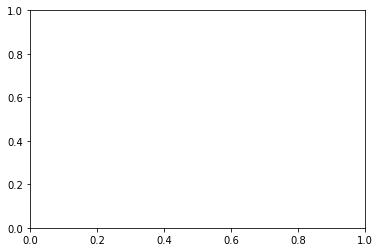

In [270]:
import seaborn as sns
fig, ax = plt.subplots()
g = sns.catplot(x='year', y='Gültig', hue='Vote type', kind='point', data=vote_types, hue_order=['office', 'postal', 'other'])
g.set(ylabel='Valid first votes (in M.)')
plt.savefig(f'{path}/figures/btw/vote_types.png')
plt.close()

Inspect whether the share of municipalities with postal/other ballot data available varies significantly for treated and untreated municipalities

In [261]:
vote_types = btw[['AGS', 'year', 'Vote type', 'treatment']]
vote_types['postal'] = np.where(vote_types['Vote type'] == 'postal', 1, 0)
vote_types['office'] = np.where(vote_types['Vote type'] == 'office', 1, 0)
vote_types['other'] = np.where(vote_types['Vote type'] == 'other', 1, 0)
vote_types = vote_types[vote_types['year'] >= 2013]
vote_types.head()

/var/folders/wm/mtrphj0s0msgrmyshf3hgk740000gn/T/ipykernel_25639/2820199629.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vote_types['postal'] = np.where(vote_types['Vote type'] == 'postal', 1, 0)
/var/folders/wm/mtrphj0s0msgrmyshf3hgk740000gn/T/ipykernel_25639/2820199629.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vote_types['office'] = np.where(vote_types['Vote type'] == 'office', 1, 0)
/var/folders/wm/mtrphj0s0msgrmyshf3hgk740000gn/T/ipykernel_25639/2820199629.py:4: SettingWithCopyWarning: 

,AGS,year,Vote type,treatment,postal,office,other
12,01001000,2013.0,office,100,0,1,0
13,01001000,2013.0,postal,100,1,0,0
14,01001000,2013.0,office,100,0,1,0
15,01001000,2013.0,postal,100,1,0,0
16,01001000,2017.0,office,100,0,1,0


In [262]:
vote_types = vote_types.groupby(['treatment', 'year'], as_index=False).sum()
vote_types['postal/office'] = vote_types['postal']/vote_types['office']
vote_types['other/office'] = vote_types['other']/vote_types['office']
vote_types = vote_types.sort_values('treatment')
vote_types.head(20)

,treatment,year,postal,office,other,postal/office,other/office
0,0,2013.0,464,932,2,0.497854,0.002146
1,0,2017.0,476,908,2,0.524229,0.002203
2,10,2013.0,543,1492,0,0.363941,0.000000
3,10,2017.0,554,1464,0,0.378415,0.000000
4,100,2013.0,2074,5466,4,0.379437,0.000732
5,100,2017.0,2104,5358,2,0.392684,0.000373
6,20,2013.0,493,1350,2,0.365185,0.001481
7,20,2017.0,510,1330,0,0.383459,0.000000
8,30,2013.0,551,1238,0,0.445073,0.000000
9,30,2017.0,564,1224,0,0.460784,0.000000


Map of control variables

In [263]:
# load df
controls_df = btw = pd.read_csv(f'{path}/data/btw_control.csv', encoding = 'UTF-8-SIG', sep=',', converters={'AGS': str})
# merge with municipalities
controls_plot = pd.merge(controls_df, municipalities, on='AGS')
controls_plot = controls_plot.set_geometry('geometry')
controls_df.columns

Index(['AGS', 'GEN', 'year', 'Land', 'post_2005', 'post_2009', 'post_2013',
       'post_2017', 'first_vote', 'second_vote', 'Vote type', 'Wähler',
       'Gültig', 'Union', 'SPD', 'FDP', 'Linke', 'Grüne', 'Andere',
       'treatment', 'treated_0', 'treated_10', 'treated_20', 'treated_30',
       'treated_50', 'treated_100', 'pop_density', 'male', 'female', 'foreign',
       'employed', 'unemployed', 'avg_income', 'avg_age', 'age 0-17',
       'age 18-24', 'age 25-44', 'age 45-64', 'age 65+', 'protestant',
       'catholic', 'religion_other'],
      dtype='object')

In [264]:
# variables we are interested in
control_vars = {'pop_density': 'Population Density', 'female': 'Share of Females', 'foreign': 'Share of Foreigners', \
     'unemployed': 'Share of Unemployed', 'avg_income': 'Average Income', 'avg_age': 'Average Age', 'catholic': 'Share of Catholics'}

In [265]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
for var, label in control_vars.items():
    fig, ax = plt.subplots(figsize=(10, 8), dpi=300)
    ax.set_aspect('equal')
    ax.set_axis_off()
    fig.suptitle(f'{label}', fontsize=20)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('bottom', size='5%', pad=0.1)
    municipalities.plot(ax=ax, color='lightblue', edgecolor='blue', lw=0.01, zorder=1)
    states.boundary.plot(ax=ax, color='darkblue', lw = 0.1, zorder=2)
    controls_plot.plot(column=var,
           ax=ax,
           cax = cax,
           legend=True,
           legend_kwds={'label': label,
                        'orientation': "horizontal"},
            missing_kwds={'color': 'lightgrey'})
    powerlines.plot(ax=ax, color='red', lw=2, zorder=2)
    ax.annotate('Source: Rajasthan Datastore, 2019',xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')
    plt.savefig(f'{path}/figures/controls/{label}.png')
    plt.close()

Control variables by treatment